<a href="https://colab.research.google.com/github/patriciairibarrem/Data-Science---Exercises/blob/main/XPe_Modulo_1_%C3%81rvore_de_Decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Base de Dados
 
 Vamos utilizar a base que contém informações de pessoas que possuem ou não diabetes. Para isso, analisar vários atributos para predizer se a pessoa possui ou não diabetes. 

A base utilizada está abaixo:

https://www.kaggle.com/saurabh00007/diabetescsv?select=diabetes.csv

#Realizando o carregamento dos dados

In [ ]:
dados_diabetes = pd.read_csv('diabetes.csv', sep = ',')

#Verificando dados do dataset

In [ ]:
dados_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#Tratando e analisando os dados

In [ ]:
dados_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dados_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#verificando valores nulos
dados_diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#Contar número de registros de cada classe

In [ ]:
dados_diabetes.groupby(['Outcome'])['Outcome'].count()

Outcome
0    500
1    268
Name: Outcome, dtype: int64

Verificando que o nosso dataset se encontra desbalanceado. Precisamos coletr dados de forma  balanceada afim de não prejudicar a classificação.

# Instalando bibliotca imblearn
Um biblioteca utilizada para tratar dados desbalanceados. A biblioteca oferece várias técnicas de reamostragem comumente usadas em conjunto de dados que monstram um forte desequilibrio entre classes.

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

#Separando conjunto de dados features a target
Nesta etapa, vamos separar os conjuntos em duas bases de dados

*   X_dados contém todas as features de cada amostra
*   Y_dados contém apenas o target (possui diabetes (outcomes) ou não possui)





In [ ]:
X_dados = dados_diabetes.drop('Outcome', axis=1).values #todas as variáveis, menos a variável label
y_dados = dados_diabetes['Outcome'].values

#Criando funções para balancear os dados
UnderSampler é  um método que consiste em reduzir o número de observações da classse majoritária para diminuir a diferença entre as categorias.

In [ ]:
def balanceamento_dados(X_dados, y_dados):
  undersample = RandomUnderSampler(random_state = 42)
  X_under, y_under = undersample.fit_resample(X_dados, y_dados)

  tl = TomekLinks(sampling_strategy='all')
  X_under, y_under = tl.fit_resample(X_under, y_under)
  return X_under, y_under

#Aplicando técnica de balanceamento na base de dados

In [ ]:
X_dados_balanceados, y_dados_balanceados = balanceamento_dados(X_dados, y_dados)

#Verificando balanceamento realizado

In [ ]:
print(len(X_dados_balanceados), len(y_dados_balanceados))

456 456


In [ ]:
#verificar lista com dados balanceados
y_dados_balanceados

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
df_dados_balanceados = pd.DataFrame(y_dados_balanceados,columns=['Outcome'])
df_dados_balanceados.groupby('Outcome')['Outcome'].count()

Outcome
0    228
1    228
Name: Outcome, dtype: int64

#Criando função para realizar sepaaração entre o conjunto de treinamento e teste
Para que o modelo de árvore de decisão tenha êxito, é necessário separarmos nossos dataset em um conjunto de daddos para trainar o modelo e um conjunto de dados para testá-lo:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def separa_treino_testa(X_dados_balanceados, y_dados_balanceados):
  X_train, X_test, y_train, y_test = train_test_split(X_dados_balanceados, y_dados_balanceados, random_state=42, test_size=0.2)
  return X_train, X_test, y_train, y_test

In [ ]:
#separando conjuntos de treino e teste
X_train, X_test, y_train, y_test = separa_treino_testa(X_dados_balanceados, y_dados_balanceados)

#Verificando dados em cada variável

In [ ]:
print(f'''vamos treinar o modelo com {len(X_train)} registros de classe X e {len(y_train)} registros de classe y testaremos o modelo com {len(X_test)} registros de classe X e {len(y_test)} registros de classe y
''')

vamos treinar o modelo com 364 registros de classe X e 364 registros de classe y testaremos o modelo com 92 registros de classe X e 92 registros de classe y



#Criando Árvore de Decisão

In [ ]:
from sklearn import tree

In [ ]:
algoritmo_arvore = tree.DecisionTreeClassifier()
modelo = algoritmo_arvore.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

#Verificando a Importância de cada feature no modelo
é muito importante visualizar a importancia de cada feature representa no modelo. Para isso, temos a função feature_importances que nos auxilia a ver o resultado desse dado

In [ ]:
print(modelo.feature_importances_)

[0.03682339 0.42021429 0.05014932 0.05414172 0.05105089 0.17107828
 0.05038475 0.16615736]


In [ ]:
dados_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
pd.DataFrame(modelo.feature_importances_, columns =['Importance'],
             index = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']).sort_values('Importance', ascending=False)

,Importance
Glucose,0.420214
BMI,0.171078
Age,0.166157
SkinThickness,0.054142
Insulin,0.051051
DiabetesPedigreeFunction,0.050385
BloodPressure,0.050149
Pregnancies,0.036823


Aqui a glicose tem maior importância.

#Verificando e analisando as classes do  modelo
Nessa etapa, vamos analisar e criar rótulos que serão utilizados no nosso modelo visual da árvore de decisão.

In [ ]:
modelo.classes_

array([0, 1])

#Criando Lista com os nomes das features e dos rótulos

In [ ]:
nomes_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
nomes_classes = ['NÃO DIABETICO', 'DIABÉTICO']

#Instalando biblioteca para visualização da árvore de decisão
Graphviz é um software de visualização de gráficos de código aberto. A visualização de gráficos é uma forma de representar informações estruturais como diagramas de gráficos abstratos e redes.

In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Observação importante!
Em alguns casos ao executar a visualização utilizando a biblioteca graphviz faz necessário realizar a instalação da ferramenta na máquina e atualizar o diretório no path do windows. 

#Criando função para visualização da árvore gerada

In [ ]:
import graphviz

In [ ]:
def visualiza_arvore(modelo):
    arvore = tree.export_graphviz(modelo,
                     feature_names=nomes_features,
                     class_names=nomes_classes,
                     rounded=True,
                     special_characters=True, filled=True)
    graph = graphviz.Source(arvore)
    return graph

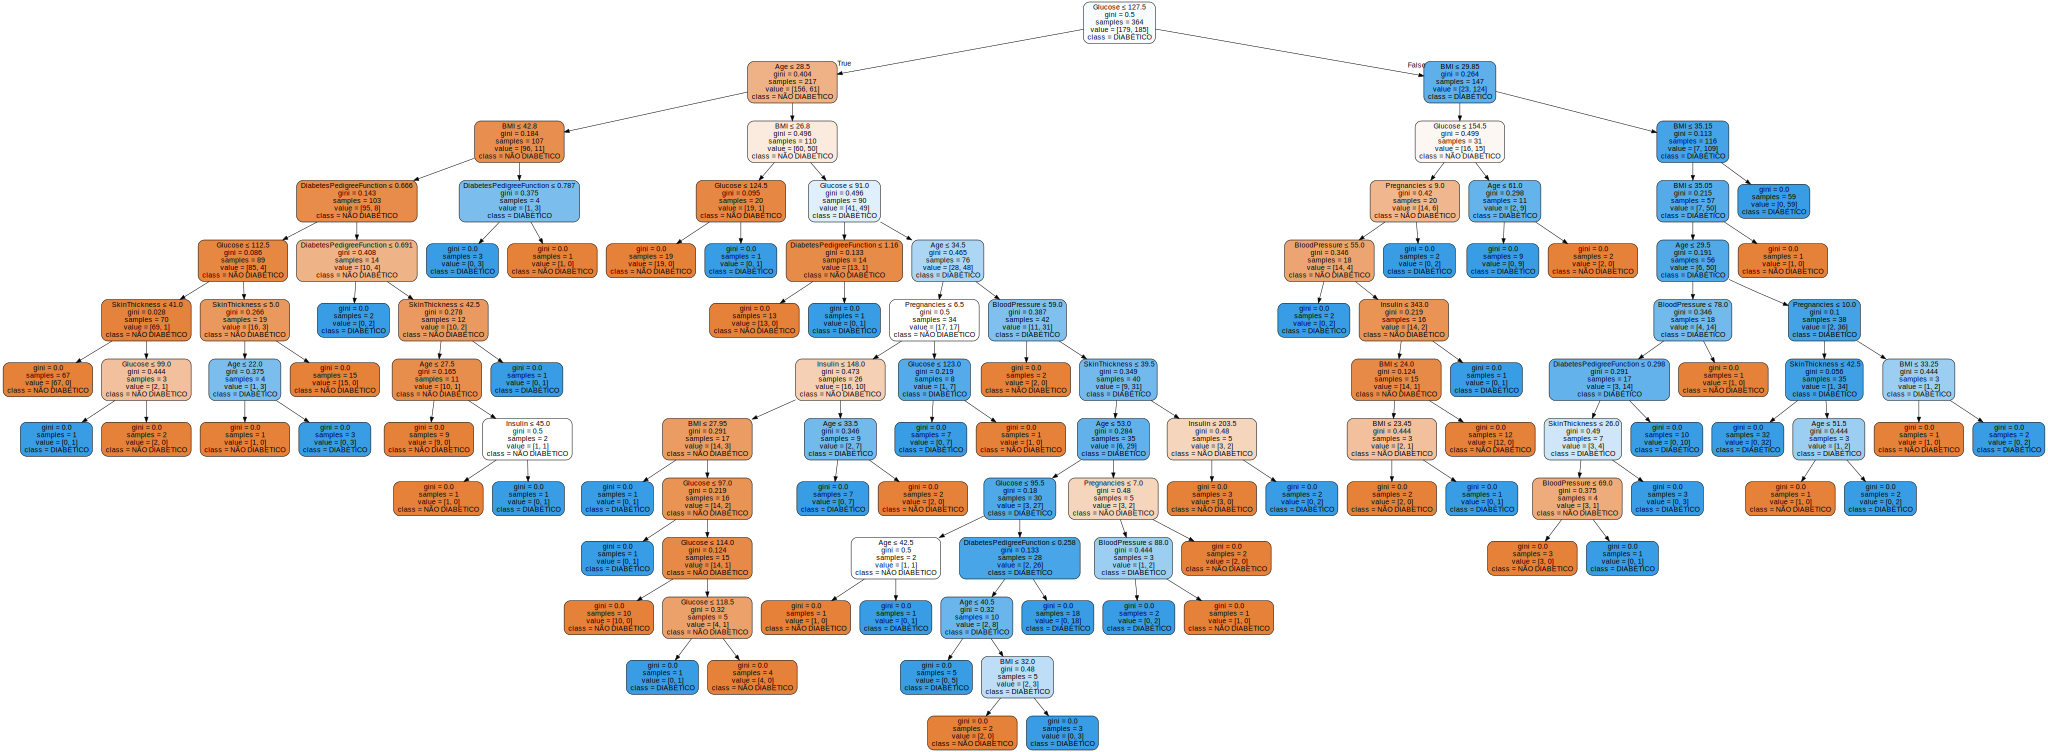

In [ ]:
visualiza_arvore(modelo)

* Identificar as features que possuem mais importancia
* Valor Indice Gini
* O número de amostras classificads em cada nó
* A classificação do target

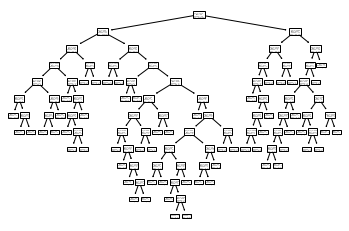

In [ ]:
tree.plot_tree(modelo)
plt.show()

#Calculando acurácia do modelo
A acurácia é uma das métricas que podemos utilizar para avaliar um modelo de ML. A acurácia é a proximidade de um resultado com o seu valor de referência real. Dessa forma, quanto maior o nível de acuracidade, mais proximo de referencia ou valor real.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.75

Observamos que para esse experimento, obtivemos uma acurácia de 75%. Ou seja, 75% de acerto em comparação a base real.

#Parei em 1:36. Falta a Poda. 